<a href="https://colab.research.google.com/github/Sudeesh07/HELLWEEK-updated/blob/main/MICRecruitment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/hell-week-mic/train.csv")
df.head()

UID                ph_no    cvv  credit_card_number  \
0  T77962103           7059868985  673.0        2.131868e+14   
1  O92591533  +1-288-810-2425x013  983.0        4.820055e+15   
2  O31883571    791.502.4387x7276  855.0        4.031429e+15   
3  M18080565           2522308761  806.0        3.036423e+13   
4  Q74073854     683-521-2001x423  424.0        4.610207e+15   

                             job                      email  \
0                           Copy  guerrerodavid@example.org   
1  Interior and spatial designer     michaela47@example.org   
2       Scientist, water quality       zhoffman@example.org   
3                   Toxicologist         hprice@example.net   
4              Software engineer      michael61@example.net   

                         url                country  emoji             name  \
0         http://garcia.org/                  Gabon      📑     Cathy Cherry   
1          http://ortiz.com/                Bermuda     🥷🏿    Austin Graham   
2          http://kelly.com/  Sao Tome and Principe    👩‍💻      Frank Smith   
3          http://mann.info/                  Korea    NaN     Austin Young   
4  https://www.mitchell.biz/     Russian Federation  💆🏿‍♂️  Kimberly Wilson   

   ...                            qhUzJ                             FpCOT  \
0  ...    🍣🏿🟠U👨@9.028568970658524@️bY‍t  N6♀rs%-0.17374199145886737%g2Fu7   
1  ...   🍣🏿🟠U👨@-40.77392373961654@️bY‍t     N6♀rs%3.836527507653148%g2Fu7   
2  ...    🍣🏿🟠U👨@32.83118091536586@️bY‍t     N6♀rs%6.673810456792015%g2Fu7   
3  ...  🍣🏿🟠U👨@-11.829454766573882@️bY‍t    N6♀rs%-10.87012476653127%g2Fu7   
4  ...   🍣🏿🟠U👨@10.957430264267883@️bY‍t   N6♀rs%-1.5309050040841568%g2Fu7   

                             zEnW3                            ASDn5  \
0  dwLNC+-16.438253859793118+D🟠Mj👩   ♀Y‍tt^-5.683708646092431^7b🎓🍣T   
1  dwLNC+-20.503862282922828+D🟠Mj👩    ♀Y‍tt^4.345119531921794^7b🎓🍣T   
2   dwLNC+31.545003675536307+D🟠Mj👩  ♀Y‍tt^-1.1189348865153141^7b🎓🍣T   
3   dwLNC+26.131133464440587+D🟠Mj👩   ♀Y‍tt^2.1159115210320385^7b🎓🍣T   
4  dwLNC+-17.670060957130605+D🟠Mj👩    ♀Y‍tt^0.132418797411758^7b🎓🍣T   

                              vF2is                            pZijn  \
0     Q👩👨H🏾?4.495020766798911?p🎨dBV   JC🍣8Q!1.3976340938324077!Wo‍6t   
1  Q👩👨H🏾?-0.19904265803833332?p🎨dBV    JC🍣8Q!3.414072326617339!Wo‍6t   
2    Q👩👨H🏾?-2.109315804181183?p🎨dBV    JC🍣8Q!6.773526691273227!Wo‍6t   
3     Q👩👨H🏾?7.373067390546165?p🎨dBV  JC🍣8Q!-0.2388097363537749!Wo‍6t   
4    Q👩👨H🏾?3.6960467337932292?p🎨dBV    JC🍣8Q!4.588960052905303!Wo‍6t   

                             WUc3c                            sCIyG  \
0  QtgcM|-2.1616012233562616|srwW❇    ♀👩🦐pq%7.619063527183258%👨Oet♀   
1    QtgcM|8.673900995107994|srwW❇  ♀👩🦐pq%-0.6359934104694338%👨Oet♀   
2   QtgcM|1.7184076239046218|srwW❇   ♀👩🦐pq%-35.95525145090523%👨Oet♀   
3    QtgcM|-5.42787813792933|srwW❇   ♀👩🦐pq%24.501780969213996%👨Oet♀   
4   QtgcM|-3.735829327461521|srwW❇   ♀👩🦐pq%18.194146730985878%👨Oet♀   

                             qaERi          state  
0    ‍🏿🟠👩X+-7.00274740118153+‍b🎨VK        Despair  
1  ‍🏿🟠👩X+-11.039355040136286+‍b🎨VK  Worthlessness  
2      ‍🏿🟠👩X+8.6752786215897+‍b🎨VK         Stress  
3  ‍🏿🟠👩X+-0.8456272162320895+‍b🎨VK        Fatigue  
4   ‍🏿🟠👩X+10.404818391481196+‍b🎨VK          Tears  

[5 rows x 111 columns]

In [ ]:
r,c = df.shape
print(r, c)

140000 111


In [ ]:
df.isna().sum()

UID                      0
ph_no                 1267
cvv                   1333
credit_card_number    1295
job                   1326
                      ... 
pZijn                 1311
WUc3c                 1312
sCIyG                 1260
qaERi                 1315
state                    0
Length: 111, dtype: int64

In [ ]:
df.columns

Index(['UID', 'ph_no', 'cvv', 'credit_card_number', 'job', 'email', 'url',
       'country', 'emoji', 'name',
       ...
       'qhUzJ', 'FpCOT', 'zEnW3', 'ASDn5', 'vF2is', 'pZijn', 'WUc3c', 'sCIyG',
       'qaERi', 'state'],
      dtype='object', length=111)

In [ ]:
df.columns.values.tolist()

['UID',
 'ph_no',
 'cvv',
 'credit_card_number',
 'job',
 'email',
 'url',
 'country',
 'emoji',
 'name',
 'K3Ll9',
 '19rjS',
 'yeIIP',
 'Bw1V5',
 '5k16L',
 'e2l5S',
 'cg31y',
 '8SVMv',
 'Xsi3p',
 'l8Y6n',
 'vRJwh',
 'CTzXJ',
 '13SMK',
 'WUuos',
 'UyaHP',
 'i6ebQ',
 'ciVeL',
 'fOHiM',
 '1AFO4',
 'b0QUS',
 'vgNLa',
 'EjWMB',
 'Z9KvZ',
 'LsnIb',
 'kMpCl',
 'gomep',
 '1Jfzv',
 'piHSs',
 'SQLeJ',
 '184Wa',
 'HTOAr',
 'gItG5',
 'K7fG4',
 '9rzVt',
 '7Jilh',
 'AOWfH',
 '7hdd4',
 '1QuOM',
 'SQUqt',
 'GZVIZ',
 'TdpFZ',
 'LeWc9',
 '6eCdH',
 'tnrKz',
 'YXZTK',
 'pCgEW',
 'hOqKS',
 'Rc2TO',
 'C3boy',
 'NgYAu',
 'pTU4e',
 'ABLCt',
 'bozM7',
 'Got9C',
 'OyOUV',
 'lcIhR',
 'aDdCa',
 'UZRdX',
 'aWUYS',
 'eX7iy',
 'tDFkL',
 'eWqKh',
 'zPoSs',
 'XIIc6',
 'QyiJU',
 'aUxm5',
 'ToGNB',
 'BYbv6',
 'VWwlJ',
 'gl2KL',
 'eWCdk',
 'qLu1T',
 'cO1Q3',
 'X2hRu',
 'sRaqu',
 'dKQBH',
 'NKspI',
 'Ncx50',
 'QfXOs',
 'Zavi4',
 'HpyWy',
 'op6uG',
 'k9NrC',
 'dTj0P',
 '9IHv6',
 'yiWZJ',
 'JDyPw',
 '3nCgU',
 'Bz7Ov',
 'uN

In [ ]:
df.isna().sum().sum()

140000

In [ ]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['UID', 'ph_no', 'job', 'email', 'url', 'country', 'emoji', 'name', 'K3Ll9', '19rjS', 'yeIIP', 'Bw1V5', '5k16L', 'e2l5S', 'cg31y', '8SVMv', 'Xsi3p', 'l8Y6n', 'vRJwh', 'CTzXJ', '13SMK', 'WUuos', 'UyaHP', 'i6ebQ', 'ciVeL', 'fOHiM', '1AFO4', 'b0QUS', 'vgNLa', 'EjWMB', 'Z9KvZ', 'LsnIb', 'kMpCl', 'gomep', '1Jfzv', 'piHSs', 'SQLeJ', '184Wa', 'HTOAr', 'gItG5', 'K7fG4', '9rzVt', '7Jilh', 'AOWfH', '7hdd4', '1QuOM', 'SQUqt', 'GZVIZ', 'TdpFZ', 'LeWc9', '6eCdH', 'tnrKz', 'YXZTK', 'pCgEW', 'hOqKS', 'Rc2TO', 'C3boy', 'NgYAu', 'pTU4e', 'ABLCt', 'bozM7', 'Got9C', 'OyOUV', 'lcIhR', 'aDdCa', 'UZRdX', 'aWUYS', 'eX7iy', 'tDFkL', 'eWqKh', 'zPoSs', 'XIIc6', 'QyiJU', 'aUxm5', 'ToGNB', 'BYbv6', 'VWwlJ', 'gl2KL', 'eWCdk', 'qLu1T', 'cO1Q3', 'X2hRu', 'sRaqu', 'dKQBH', 'NKspI', 'Ncx50', 'QfXOs', 'Zavi4', 'HpyWy', 'op6uG', 'k9NrC', 'dTj0P', '9IHv6', 'yiWZJ', 'JDyPw', '3nCgU', 'Bz7Ov', 'uN0aA', 'OaMqz', 'qhUzJ', 'FpCOT', 'zEnW3', 'ASDn5', 'vF2is', 'pZijn', 'WUc3c', 'sCIyG', 'qaERi', 'state']
N

In [ ]:
df[cat_col].nunique()

UID      139995
ph_no    138733
job         639
email    114112
url       61091
          ...  
pZijn    138689
WUc3c    138688
sCIyG    138740
qaERi    138685
state        10
Length: 109, dtype: int64

In [ ]:
df['K3Ll9'].unique()

array(['nwZga^-2.1507574515761925^tw❇CQ',
       'nwZga^1.1902903499515378^tw❇CQ', 'nwZga^4.560736623294366^tw❇CQ',
       ..., 'nwZga^-0.462790406264862^tw❇CQ',
       'nwZga^0.27733662735325126^tw❇CQ',
       'nwZga^-1.6944982166166347^tw❇CQ'], dtype=object)

In [ ]:
df['13SMK'].unique()

array(['l👷Rjw#0.5765064032235798#🚵🏤G️V', 'l👷Rjw#-5.324604977458646#🚵🏤G️V',
       'l👷Rjw#-1.737714473124556#🚵🏤G️V', ...,
       'l👷Rjw#-3.7492589897122937#🚵🏤G️V',
       'l👷Rjw#0.6930588752626925#🚵🏤G️V', 'l👷Rjw#8.14780503186541#🚵🏤G️V'],
      dtype=object)

In [ ]:
y = df['state']
X = df.drop('state', axis = 1)

Pre-processing code

In [ ]:
'''def preprocess(df):
  df = df.drop(['UID', 'ph_no', 'cvv', 'credit_card_number', 'job', 'email', 'url', 'country', 'emoji', 'name'], axis=1)
  for index, row in df.iterrows():
    for value in row:
      if pd.notna(value):
        try:
          value = float(value[6:-6])
        except:
          print(f'{value, type(value)}, exception')
  df= df.fillna(df.median())
  return df
df_new = preprocess(df_new)'''

def preprocess(df):
    df.drop(['UID', 'ph_no', 'cvv', 'credit_card_number', 'job', 'email', 'url', 'country', 'emoji', 'name'], axis=1, inplace=True)
    for column_name in df.columns:
        for index, value in enumerate(df[column_name]):
            if pd.notna(value):
                try:
                    df.at[index, column_name] = float(str(value)[6:-6])
                except:
                    print(f'Error: {value}, type: {type(value)}, exception')

    df.fillna(df.median(), inplace=True)
    return df




It takes a long time but works need to do something to improve the time it takes to process

In [ ]:
X = preprocess(X)


"def cleaner(row):\n\n    if row in [np.nan,'nan',0.0]:\n        return row\n    else:\n        try:\n            return float(row[6:-6])\n        except:\n            print(f'{row, type(row)}, exception')\ndef pre_process(df, mode):\n    df = df.drop(['UID', 'ph_no', 'cvv', 'credit_card_number', 'job', 'email', 'url', 'country', 'emoji', 'name'], axis=1)\n    n = len(df.columns) if mode == 'test' else -1\n    for i in df.columns[:n]:\n        df[i] = df[i].apply(cleaner)\n    df = df.fillna(df.median())\n    return df\ndf = pre_process(df, 'train')"

In [ ]:
X.head()

K3Ll9      19rjS      yeIIP      Bw1V5     5k16L      e2l5S     cg31y  \
0 -2.150757 -47.000246   7.191216  12.185065 -1.052368  12.327996 -0.942543   
1  1.190290  -6.230500 -17.179968  23.406359  3.302922  15.152568  1.800888   
2  4.560737  21.534617  45.301605 -18.885383 -4.262870  15.240195  2.277867   
3 -6.065571  10.830221 -22.028616  37.893639  6.572904 -15.721931  0.937195   
4 -6.973737 -12.733164   3.526667   6.197023 -4.558279   1.983331 -6.268420   

       8SVMv     Xsi3p      l8Y6n  ...      OaMqz      qhUzJ      FpCOT  \
0  -3.873027  0.095375 -16.025223  ... -44.211100   9.028569  -0.173742   
1  26.712200  3.355243 -14.066914  ...  18.514747 -40.773924   3.836528   
2 -38.563421 -0.081912  43.465217  ...  -5.282210  32.831181   6.673810   
3  12.122230 -3.470688 -30.678336  ... -10.487964 -11.829455 -10.870125   
4 -22.880463 -9.099905 -23.860119  ...   0.801779  10.957430  -1.530905   

       zEnW3     ASDn5     vF2is     pZijn     WUc3c      sCIyG      qaERi  
0 -16.438254 -5.683709  4.495021  1.397634 -2.161601   7.619064  -7.002747  
1 -20.503862  4.345120 -0.199043  3.414072  8.673901  -0.635993 -11.039355  
2  31.545004 -1.118935 -2.109316  6.773527  1.718408 -35.955251   8.675279  
3  26.131133  2.115912  7.373067 -0.238810 -5.427878  24.501781  -0.845627  
4 -17.670061  0.132419  3.696047  4.588960 -3.735829  18.194147  10.404818  

[5 rows x 100 columns]

In [ ]:
X.isna().sum()

K3Ll9    0
19rjS    0
yeIIP    0
Bw1V5    0
5k16L    0
        ..
vF2is    0
pZijn    0
WUc3c    0
sCIyG    0
qaERi    0
Length: 100, dtype: int64

In [ ]:
X.isna().sum().sum()

0

array([[<Axes: title={'center': 'K3Ll9'}>,
        <Axes: title={'center': '19rjS'}>,
        <Axes: title={'center': 'yeIIP'}>,
        <Axes: title={'center': 'Bw1V5'}>,
        <Axes: title={'center': '5k16L'}>,
        <Axes: title={'center': 'e2l5S'}>,
        <Axes: title={'center': 'cg31y'}>,
        <Axes: title={'center': '8SVMv'}>,
        <Axes: title={'center': 'Xsi3p'}>,
        <Axes: title={'center': 'l8Y6n'}>],
       [<Axes: title={'center': 'vRJwh'}>,
        <Axes: title={'center': 'CTzXJ'}>,
        <Axes: title={'center': '13SMK'}>,
        <Axes: title={'center': 'WUuos'}>,
        <Axes: title={'center': 'UyaHP'}>,
        <Axes: title={'center': 'i6ebQ'}>,
        <Axes: title={'center': 'ciVeL'}>,
        <Axes: title={'center': 'fOHiM'}>,
        <Axes: title={'center': '1AFO4'}>,
        <Axes: title={'center': 'b0QUS'}>],
       [<Axes: title={'center': 'vgNLa'}>,
        <Axes: title={'center': 'EjWMB'}>,
        <Axes: title={'center': 'Z9KvZ'}>,
        <

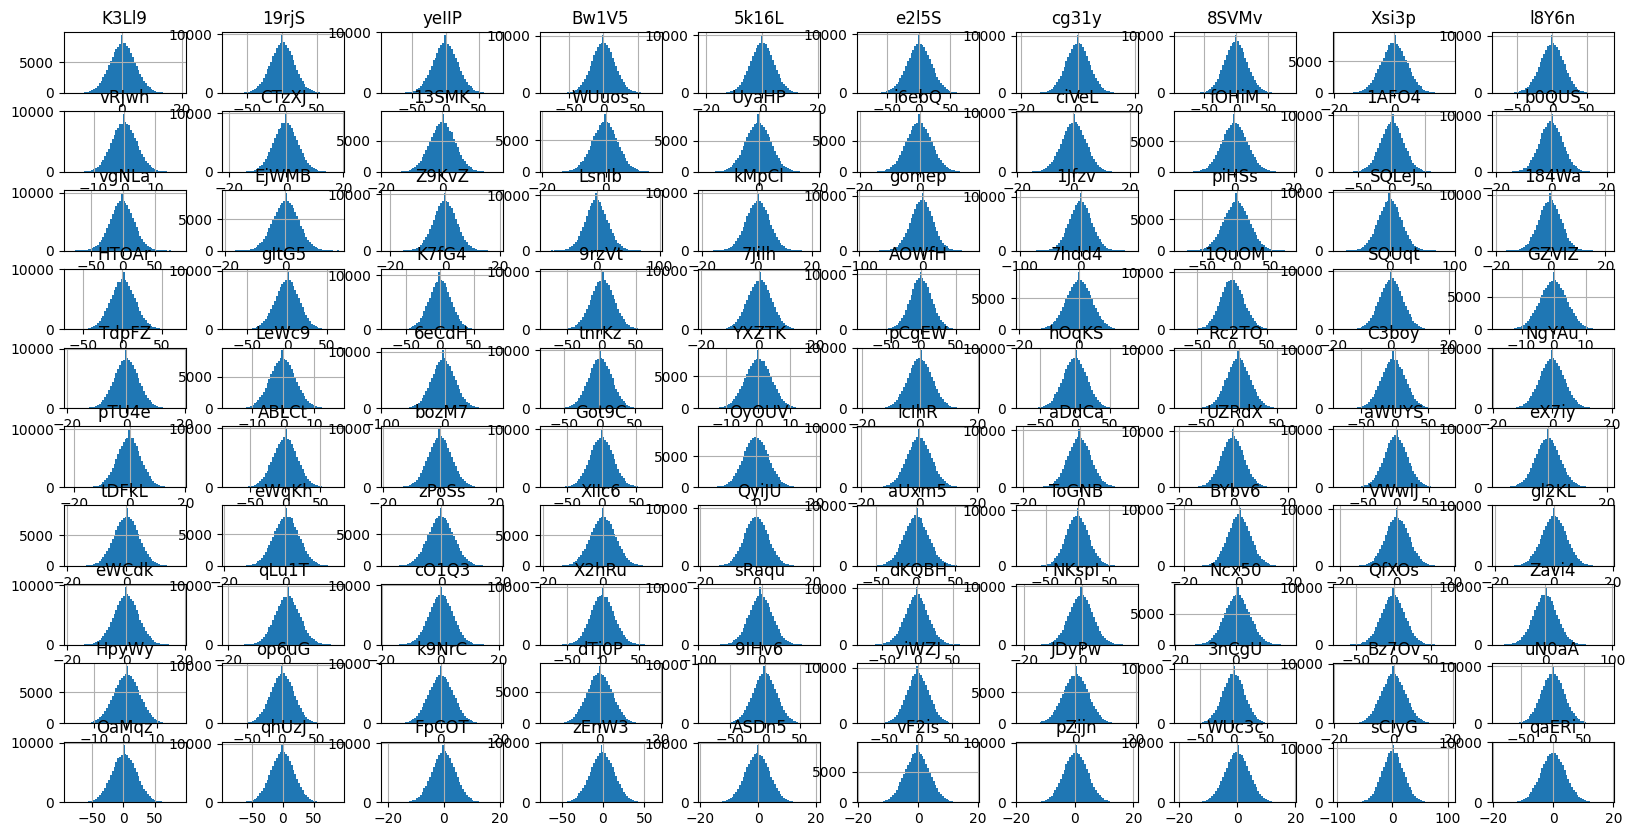

In [ ]:
X.hist(bins=60,figsize=(20,10))

In [ ]:
from sklearn.preprocessing import LabelEncoder as LE

le=LE()
y=le.fit_transform(y)

In [ ]:
y

array([2, 9, 7, ..., 7, 4, 9])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


In [ ]:
X_train.head()

K3Ll9      19rjS      yeIIP      Bw1V5      5k16L      e2l5S  \
131402 -2.117505 -17.572860  -0.846728  11.430559  11.685201  12.669132   
123639 -2.346427  -1.086782 -11.206436  35.434625  -3.433003 -20.048293   
42980   2.240834  10.417830  20.275255  26.937090   0.837991  20.094450   
32626  -6.752238 -10.973557 -26.633767  -0.115540  -4.699609   5.507524   
87930  -2.243499 -13.938946   1.776538   3.183257   0.196892  -2.072154   

           cg31y      8SVMv     Xsi3p      l8Y6n  ...      OaMqz      qhUzJ  \
131402 -5.090059 -11.665990 -1.672684   9.852434  ...  19.336435  33.405308   
123639 -0.151658 -17.285530  0.056369  20.449651  ... -21.601042  28.440589   
42980  -6.607058   1.206186 -3.766285   2.624004  ...  -2.010271 -16.710056   
32626   2.035873   6.386373  0.667625   8.785964  ...  -4.897485 -35.592927   
87930   6.531641   3.604717  8.165270 -11.865837  ...  47.048381  -0.298878   

           FpCOT      zEnW3      ASDn5     vF2is     pZijn     WUc3c  \
131402  2.341573 -11.576331  -0.570829  0.980280  5.154357 -2.564307   
123639  0.990665  25.336026   3.739810  2.532976  5.138486 -6.745737   
42980   3.209557 -10.759594  11.280873 -0.566778  6.999592 -0.789084   
32626  -3.755653  -9.136163   0.402853  3.426483 -4.339654 -3.230704   
87930  -1.239099  -9.352293  -3.564671  5.991125  8.285383  2.025468   

            sCIyG     qaERi  
131402   4.644339 -4.429352  
123639 -13.622731  7.790131  
42980   18.296314  3.799769  
32626   11.801005  0.446178  
87930   44.521336  5.108240  

[5 rows x 100 columns]

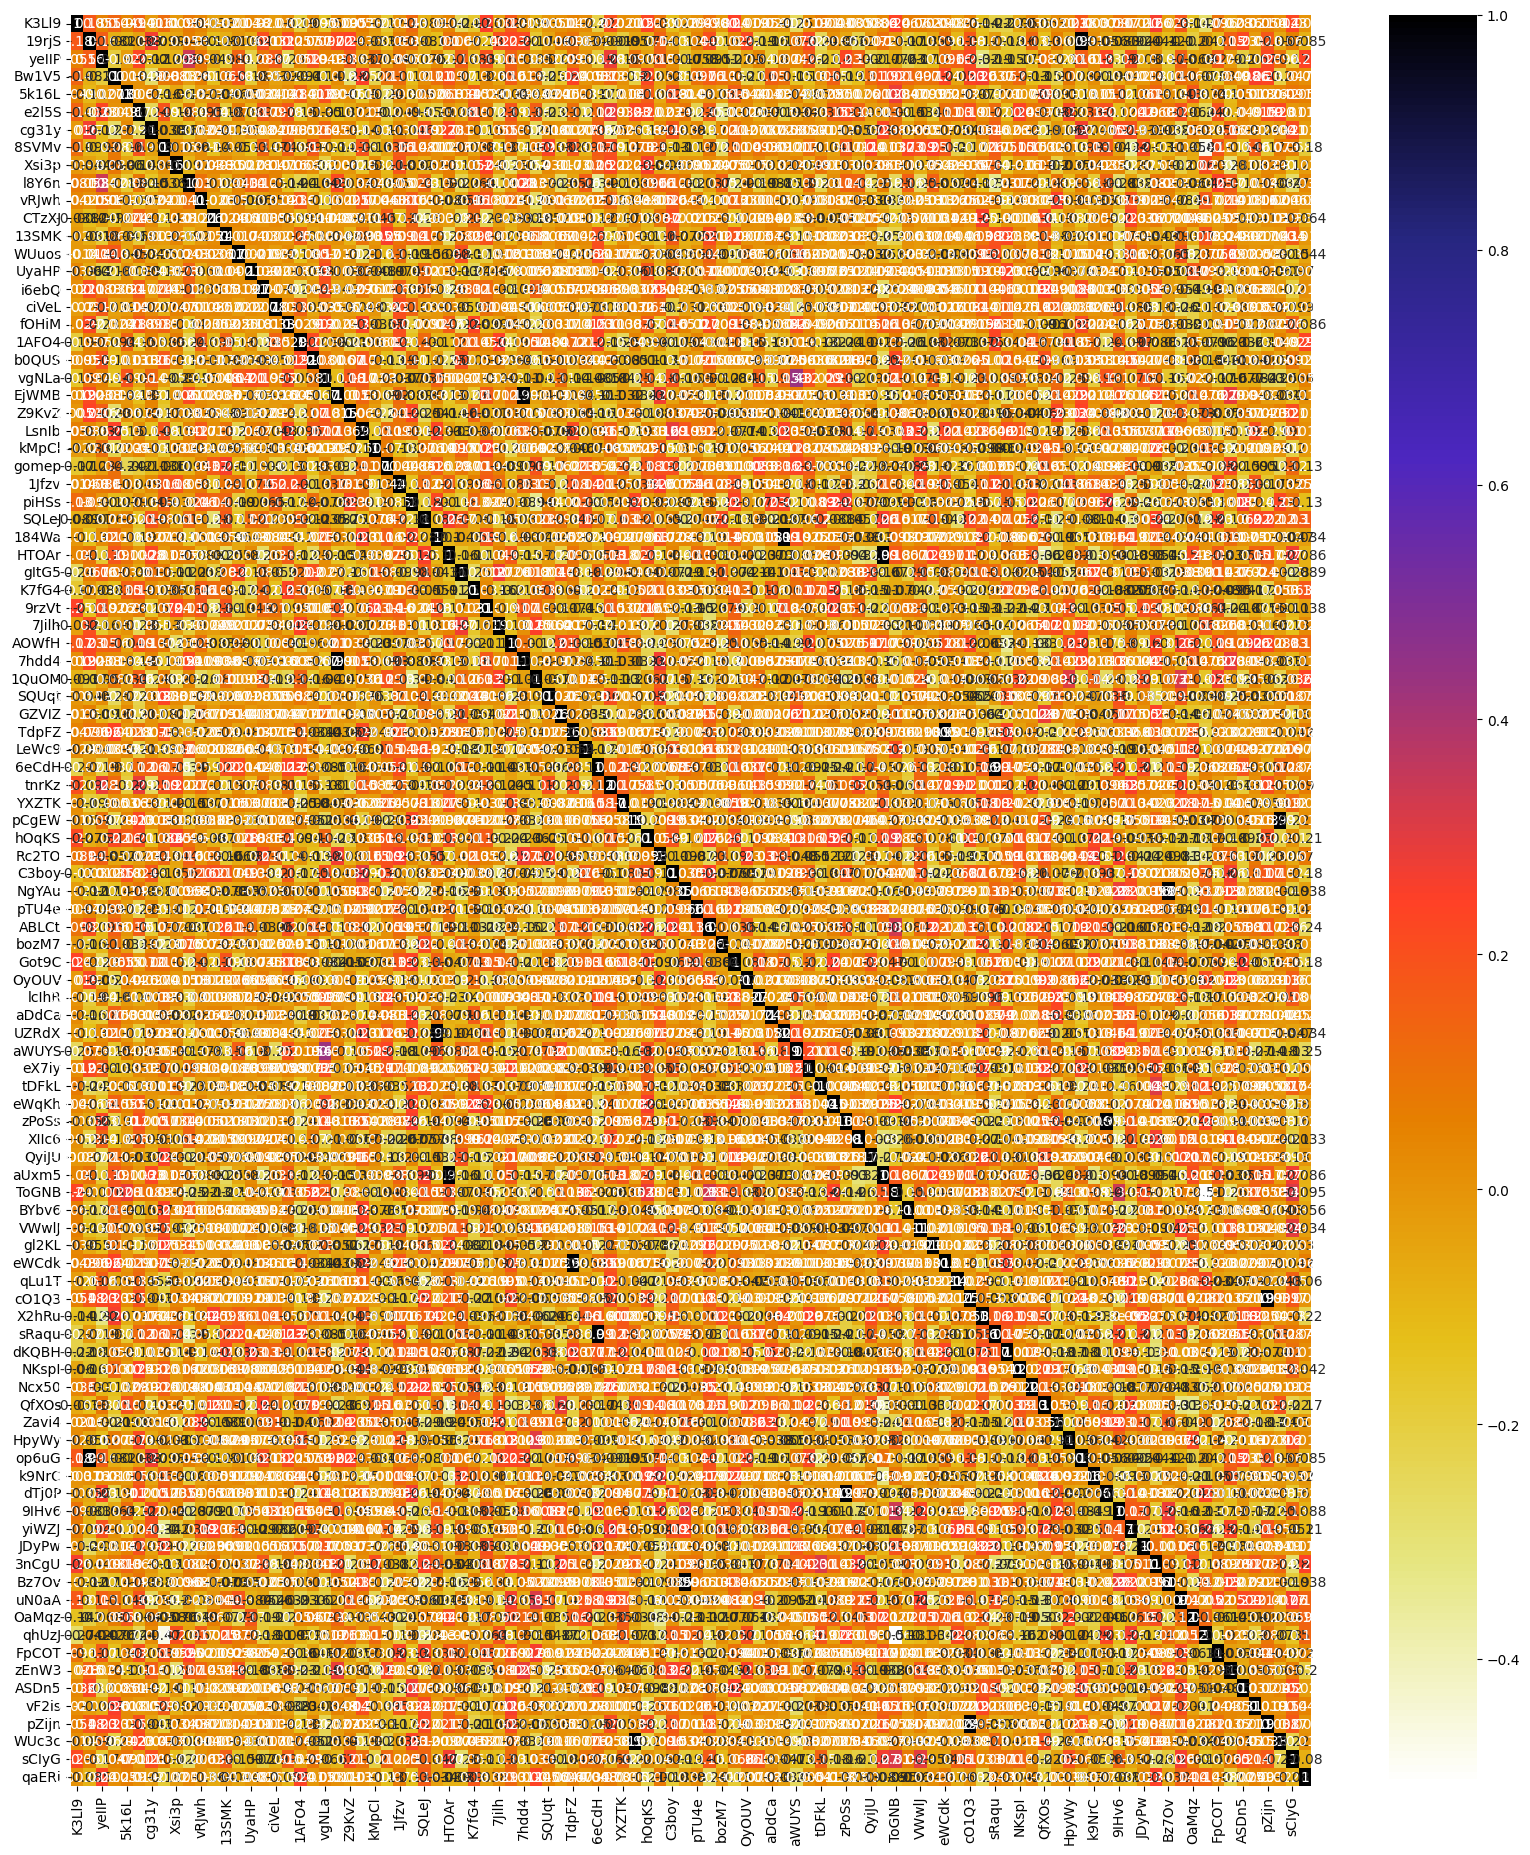

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,23))
cor =  X_train.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

10

In [ ]:
corr_features

{'7hdd4',
 'Bz7Ov',
 'UZRdX',
 'WUc3c',
 'aUxm5',
 'dTj0P',
 'eWCdk',
 'op6uG',
 'pZijn',
 'sRaqu'}

In [ ]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization


In [ ]:

model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))


model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 512)               51712     
                                                                 
 batch_normalization_4 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_38 (Dense)            (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_39 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_5 (Bat  (None, 128)               512       
 chNormalization)                                     

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=20, verbose=1, validation_split=0.05)

Epoch 1/15
5320/5320 [==============================] - 58s 11ms/step - loss: 1.1320 - accuracy: 0.6260 - val_loss: 0.3023 - val_accuracy: 0.9134
Epoch 2/15
5320/5320 [==============================] - 38s 7ms/step - loss: 0.5361 - accuracy: 0.8391 - val_loss: 0.2207 - val_accuracy: 0.9421
Epoch 3/15
5320/5320 [==============================] - 39s 7ms/step - loss: 0.4250 - accuracy: 0.8772 - val_loss: 0.1793 - val_accuracy: 0.9579
Epoch 4/15
5320/5320 [==============================] - 40s 8ms/step - loss: 0.3712 - accuracy: 0.8966 - val_loss: 0.1688 - val_accuracy: 0.9620
Epoch 5/15
5320/5320 [==============================] - 37s 7ms/step - loss: 0.3416 - accuracy: 0.9072 - val_loss: 0.1621 - val_accuracy: 0.9629
Epoch 6/15
5320/5320 [==============================] - 39s 7ms/step - loss: 0.3153 - accuracy: 0.9160 - val_loss: 0.1508 - val_accuracy: 0.9655
Epoch 7/15
5320/5320 [==============================] - 39s 7ms/step - loss: 0.2930 - accuracy: 0.9227 - val_loss: 0.1449 - val_a

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
print(f"Accuracy: {accuracy}")

875/875 [==============================] - 3s 3ms/step
Accuracy: 0.9808214285714286


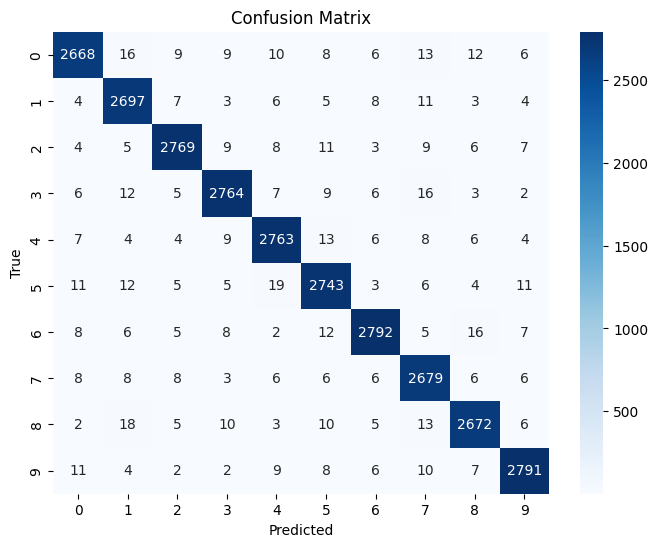

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_true_classes = np.argmax(y_test, axis=1)

confusion = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2757
           1       0.97      0.98      0.98      2748
           2       0.98      0.98      0.98      2831
           3       0.98      0.98      0.98      2830
           4       0.98      0.98      0.98      2824
           5       0.97      0.97      0.97      2819
           6       0.98      0.98      0.98      2861
           7       0.97      0.98      0.97      2736
           8       0.98      0.97      0.98      2744
           9       0.98      0.98      0.98      2850

    accuracy                           0.98     28000
   macro avg       0.98      0.98      0.98     28000
weighted avg       0.98      0.98      0.98     28000



In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/hell-week-mic/test.csv')


In [ ]:
df_test_preprocessed = df_test.copy()

In [ ]:
df_test_preprocessed=preprocess(df_test_preprocessed)

In [ ]:
df_test_preprocessed.head()

K3Ll9      19rjS      yeIIP      Bw1V5     5k16L      e2l5S     cg31y  \
0   2.887040  -7.309923  19.071947 -20.583563 -3.338531  35.718716 -3.314161   
1   5.654553   6.050330   2.923975 -15.514720 -0.061644  -1.254137  6.067391   
2   3.053784  25.244685   6.269036   0.076592 -1.813872  43.845319 -0.819727   
3   1.488450   0.283862  27.788565  28.980005 -1.681160  -1.215674 -0.598728   
4  10.885250 -22.040204  -7.699833  22.169769  6.763151  14.833072 -6.158491   

       8SVMv     Xsi3p      l8Y6n  ...      OaMqz      qhUzJ     FpCOT  \
0  12.582761  0.968303   5.687697  ... -21.248937  -5.726684  1.577796   
1   3.048152 -1.617459   7.014764  ... -33.934399 -19.149704 -2.868718   
2  11.620422 -2.116804   9.157089  ...  12.391218 -14.048287 -5.027959   
3  21.140887  3.825426  14.212199  ...  11.456072 -12.459837 -3.448771   
4  20.194413  0.961350   0.608986  ...  19.865807 -24.537809  1.106189   

       zEnW3     ASDn5     vF2is     pZijn     WUc3c      sCIyG     qaERi  
0  -8.911004  5.981008 -1.297894 -1.673945  1.446459 -29.421645  1.795004  
1  15.453724 -6.211322 -0.933979  0.001376 -4.159291  -1.540406  1.296943  
2   6.754527  7.670390  0.347081  1.407364  6.091721 -22.070410 -3.748772  
3  20.407682 -1.601812  1.355095  0.979308 -1.409996   2.120580 -3.924106  
4 -14.192347  3.930237  9.832580 -0.672717 -7.779142  15.756719 -7.693867  

[5 rows x 100 columns]

In [ ]:
y_pred = model.predict(df_test_preprocessed)

1875/1875 [==============================] - 6s 3ms/step


In [ ]:
y_pred

array([[1.06185226e-11, 1.93724047e-11, 1.18332618e-11, ...,
        1.88400989e-10, 3.24216280e-08, 3.23233385e-11],
       [2.60936901e-07, 8.15292100e-09, 4.98689315e-06, ...,
        9.99992192e-01, 2.31210564e-07, 1.31678533e-07],
       [9.99999940e-01, 2.41492737e-09, 2.49442151e-11, ...,
        1.96471728e-11, 1.32429789e-10, 8.77790069e-15],
       ...,
       [1.20745614e-09, 1.73863137e-12, 2.27577440e-12, ...,
        1.17827683e-11, 9.99999940e-01, 1.70454285e-14],
       [5.31229019e-11, 2.24909783e-12, 2.43523986e-11, ...,
        9.99999940e-01, 3.83866360e-13, 6.47927111e-12],
       [6.32440790e-17, 1.64480822e-14, 2.34954036e-18, ...,
        5.39347816e-18, 9.99999940e-01, 1.03424113e-16]], dtype=float32)

In [ ]:
y_pred.size

600000

In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)

print(y_pred_classes)

[5 7 0 ... 8 7 8]


In [ ]:
y_pred = le.inverse_transform(y_pred_classes)


In [ ]:
y_pred

array(['Nausea', 'Stress', 'Anxiety', ..., 'Tears', 'Stress', 'Tears'],
      dtype=object)

In [ ]:
df_test

UID                   ph_no     cvv  credit_card_number  \
0      675919160   001-869-364-3240x1461   632.0        4.787566e+12   
1      V09461652     +1-573-696-9623x435   548.0        4.804074e+15   
2      S75396644    001-755-901-1494x000   808.0        4.890170e+15   
3      598599835       (625)805-7487x931  9468.0        5.428366e+15   
4      W60397022      556-206-9662x97397   647.0        2.131239e+14   
...          ...                     ...     ...                 ...   
59995  G18996472  001-354-705-4724x96174   546.0        2.131534e+14   
59996  119545284       541.850.1553x8339   248.0        3.479339e+14   
59997  Q57447995      936.930.2490x92938   446.0        1.800868e+14   
59998  611053577            326.820.7743   446.0        3.674868e+13   
59999  C13097269            393.924.0554   653.0        2.131188e+14   

                                         job                         email  \
0                Scientist, research (maths)  lawrencereginald@example.org   
1           Higher education careers adviser        jennifer41@example.org   
2                                Illustrator      valdezsheryl@example.net   
3                     Audiological scientist                           NaN   
4      Development worker, international aid    jefferyrussell@example.org   
...                                      ...                           ...   
59995                           Psychiatrist         michael80@example.org   
59996                            Chiropodist      sandragarner@example.com   
59997                             Bookseller           yharris@example.com   
59998                 Health service manager      tammywallace@example.org   
59999                  Editor, commissioning      jefferybarry@example.net   

                                   url                           country  \
0                   http://walker.org/                          Honduras   
1                     http://shah.com/              Netherlands Antilles   
2                  http://barrett.com/  Lao People's Democratic Republic   
3                 http://melendez.com/                      Sierra Leone   
4                    http://hicks.net/                     Faroe Islands   
...                                ...                               ...   
59995  http://www.martinez-rogers.com/                              Cuba   
59996           http://www.brooks.com/                          Kiribati   
59997     https://www.white-green.com/                             Benin   
59998           https://www.rojas.com/                           Liberia   
59999              http://miller.info/      United States Virgin Islands   

       emoji               name  ...                            OaMqz  \
0      🧜🏻‍♀️       Jean Barajas  ...  Iwp🏤5!-21.248937402363666!G🚵O‍🏿   
1      💁🏻‍♀️       Sandra Ellis  ...  Iwp🏤5!-33.934398562714854!G🚵O‍🏿   
2         👭🏼    Elizabeth Smith  ...   Iwp🏤5!12.391218072873253!G🚵O‍🏿   
3         🖲️  Allison Rodriguez  ...   Iwp🏤5!11.456072353615188!G🚵O‍🏿   
4         🏌️       Helen Howell  ...   Iwp🏤5!19.865807379370352!G🚵O‍🏿   
...      ...                ...  ...                              ...   
59995   👩🏿‍🦯     Shawn Reynolds  ...    Iwp🏤5!19.64959128366434!G🚵O‍🏿   
59996  🤷🏼‍♂️       Jason Turner  ...                              NaN   
59997   👩🏾‍🏭      Melissa Cooke  ...    Iwp🏤5!32.36842230947374!G🚵O‍🏿   
59998      🫁       Mariah Stone  ...  Iwp🏤5!-17.347608167430856!G🚵O‍🏿   
59999   🧗‍♀️      Nicole Murphy  ...    Iwp🏤5!9.144158603106321!G🚵O‍🏿   

                                 qhUzJ                            FpCOT  \
0       🍣🏿🟠U👨@-5.726684042857591@️bY‍t   N6♀rs%1.5777964549882526%g2Fu7   
1      🍣🏿🟠U👨@-19.149703711482513@️bY‍t   N6♀rs%-2.868717979567546%g2Fu7   
2      🍣🏿🟠U👨@-14.048287304034654@️bY‍t   N6♀rs%-5.027959013789114%g2Fu7   
3      🍣🏿🟠U👨@-12.459836898257926@️bY‍t  N6♀rs%-3.4487706404694176%g2Fu7   
4       🍣🏿🟠U👨@-24.53780901409825@️bY‍t   N6♀rs

In [ ]:
submission = pd.DataFrame({"UID": df_test["UID"], "state": y_pred})


In [ ]:
submission.to_csv('micsubmission.csv', index=False)
